In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [4]:
from sklearn.metrics import accuracy_score

print("정확도 : ", accuracy_score(y, y_pred))

정확도 :  0.9121265377855887


* 정밀도

In [5]:
from sklearn.metrics import precision_score

print("정밀도 : ", precision_score(y, y_pred))

정밀도 :  0.900990099009901


* 재현율

In [6]:
from sklearn.metrics import recall_score

print("재현율 : ", recall_score(y, y_pred))

재현율 :  0.8584905660377359


* F1 score

In [7]:
from sklearn.metrics import f1_score
print("F1 score : ", f1_score(y, y_pred))

F1 score :  0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [15]:
from sklearn.preprocessing import Binarizer

import pandas as pd
import numpy as np

# 임계값 설정
custom_threshold = 0.1

# 클래스가 0인 Column 추출
pred_proba = model_lor.predict_proba(X)
pred_proba_0 = pred_proba[:,0].reshape(-1,1)

# Binarizer
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_0)
y_pred2 = binarizer.transform(pred_proba_0)

In [17]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
from sklearn.metrics import confusion_matrix
print("오차 행렬 :\n", confusion_matrix(y, y_pred2))

from sklearn.metrics import accuracy_score
print("정확도 : ", accuracy_score(y, y_pred2))

from sklearn.metrics import precision_score
print("정밀도 : ", precision_score(y, y_pred2))

from sklearn.metrics import recall_score
print("재현율 : ", recall_score(y, y_pred2))

from sklearn.metrics import f1_score
print("F1 score : ", f1_score(y, y_pred2))

오차 행렬 :
 [[  1 356]
 [139  73]]
정확도 :  0.13005272407732865
정밀도 :  0.17016317016317017
재현율 :  0.3443396226415094
F1 score :  0.2277691107644306


* ROC 곡선 시각화

In [19]:
from sklearn.metrics import roc_curve 

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

# FPR, TPR, 임계값
fprs, tprs, thresholds = roc_curve(y, pred_proba_1)

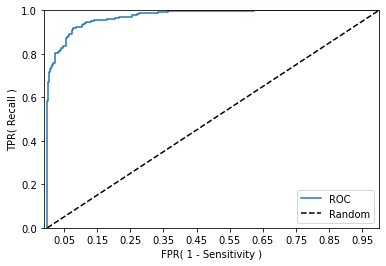

In [23]:
import matplotlib.pyplot as plt 

plt.plot(fprs , tprs, label='ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# FPR X 축의 Scale을 0.1 단위로 변경  
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(-0.01,1); plt.ylim(0,1)
plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
plt.legend()
plt.show()

* ROC AUC 값

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y, pred_proba_1)
print("ROC AUC 값 : ", roc_auc)

ROC AUC 값 :  0.9741557000158554
